In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm,rcParams
import os
import numpy as np
import copy as cp
import random as rd
from scipy.stats import kstest
from scipy.stats import ks_2samp


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
# ------------------------------Motivation Plot-----------------------------
# You should configure the proper path to processed results, for example, "./Example/ProcRes/"

In [3]:
def get_all_draws(Name):
    Res = {}
    Path = "./Example/ProcRes/" + Name + ".txt"
    with open(Path) as fr:
        for f in fr:
            data = f[:-1].split(" ")
            name = data[0]
            lat = float(data[1])
            hit = float(data[2])
            Res[name] = [lat,hit]
            
    
    return Res


def relative_res(Data1,Data2,Sign=1):
    Res = []
    for i in range(len(Data1)):
        res = (Data2[i] - Data1[i]) / Data1[i] * 100 * Sign
        Res.append(res)
    return Res

In [4]:
SynRes = get_all_draws("Synthetic")
BiliRes = get_all_draws("Bilibili")

* Cache Size: 256


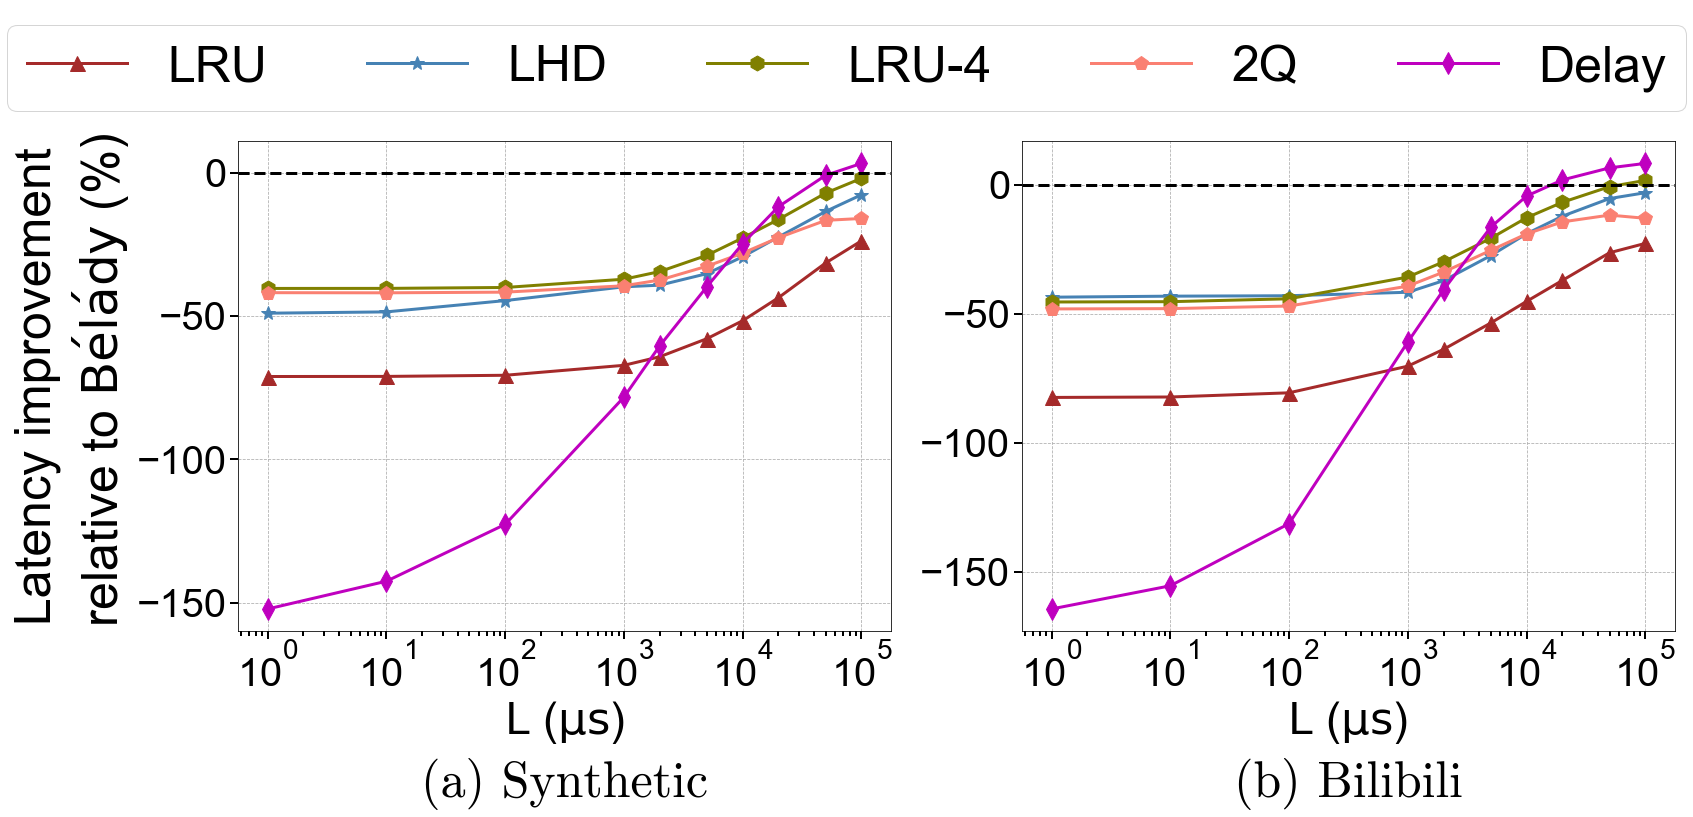

In [14]:
font1 = {"family":'Arial',"weight":'normal','size':45}
font2 = {"family":'Arial',"weight": 'normal', 'size': 50}
font3 = {"family":'Arial',"weight": 'normal', 'size': 50}
Label_Size = 40
Title_Size = 50
fpath = os.path.join(rcParams["datapath"],"fonts/ttf/cmr10.ttf")
prop = fm.FontProperties(fname=fpath)

from pylab import *
MaLen = 8
MiLen = 5
mwith = 2
bwith = 1.7


CSets = {"LFU":"c","LRU":"brown","LRU-MAD":"b","LHD-MAD":"g","LA-Cache":"r","LHD":"steelblue","2Q":"salmon","LRU-4":"olive","Delay":"m"}
CMarks = {"LRU":"^","LRU-MAD":"v","LHD-MAD":"o","LA-Cache":"s","LHD":"*","2Q":"p","LRU-4":"h","Delay":"d","LFU":"H"}

NameLabel = {"Belady-Size":"BeladyS","Belady":"Belady","LFU":"LFU","LHD":"LHD","LRU-MAD":"LRUAD","LRU":"LRU",
             "LRU-4":"LRUK","2Q":"TwoQ","Delay":"AD"}

Labels = ["LRU","LFU","LHD","2Q","LRU-4","Belady","Belady-Size","Delay","PB-Size","LRU-MAD"]


Delays = [1,10,100,1000,2000,5000,10000,20000,50000,100000]

# Configure Cache Size to Draw Plot
CSize = 256

print("* Cache Size:",CSize)

fig = plt.figure(figsize=(24,13))

TLabels = ["LRU","LHD","LRU-4","2Q","Delay","Belady"]

# first
ax1 = fig.add_subplot(121)

Ys = {}
for l in TLabels:
    Name = NameLabel[l]
    Y = []
    for d in Delays:
        Name2 = Name + "-" + str(CSize) + "-" + str(d)
        Y.append(SynRes[Name2][0])
    Ys[Name] = Y

GYs = {}
for ky in Ys.keys():
    By = Ys["Belady"]
    Ds = Ys[ky]
    Gy = relative_res(By,Ds,-1)
    GYs[ky] = Gy

LNs = []
X = Delays    
for i in range(len(TLabels)-1):
    Label = TLabels[i]
    Name = NameLabel[Label]
    Y = GYs[Name]
    Col = CSets[Label]
    mark = CMarks[Label]
    ln = ax1.semilogx(X,Y,color=Col,label=Label,marker=mark,linewidth=3,markersize=15)
    LNs += ln

ax1.set_xscale("log")
ax1.set_ylabel("Latency improvement\n relative to $\mathrm{B\\'{e}l\\'{a}dy}$ (%)",font2)
ax1.set_xlabel("L ($\mathrm{\mu s}$)",font1)
ax1.tick_params(labelsize=Label_Size)
plt.grid(ls='--')
plt.xticks([1,10,100,1000,10000,100000],fontproperties = 'Arial',size=40)
plt.yticks(fontproperties = 'Arial',size=40)

plt.axhline(y=0,linestyle="--",linewidth=3,color="k")

x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax1.xaxis.set_minor_locator(x_minor)
ax1.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
tick_params(which='minor',length=MiLen,width=mwith)
tick_params(which='major',length=MaLen,width=mwith)

ax1.set_title("(a) Synthetic",y=-0.35,fontproperties=prop,fontsize=Title_Size)


# second
ax2 = fig.add_subplot(122)

Ys = {}
for l in TLabels:
    Name = NameLabel[l]
    Y = []
    for d in Delays:
        Name2 = Name + "-" + str(CSize) + "-" + str(d)
        Y.append(BiliRes[Name2][0])
    Ys[Name] = Y

GYs = {}
for ky in Ys.keys():
    By = Ys["Belady"]
    Ds = Ys[ky]
    Gy = relative_res(By,Ds,-1)
    GYs[ky] = Gy

X = Delays    
for i in range(len(TLabels)-1):
    Label = TLabels[i]
    Name = NameLabel[Label]
    Y = GYs[Name]
    Col = CSets[Label]
    mark = CMarks[Label]
    ax2.semilogx(X,Y,color=Col,label=Label,marker=mark,linewidth=3,markersize=15)

ax2.set_xscale("log")
ax2.set_xlabel("L ($\mathrm{\mu s}$)",font1)
ax2.tick_params(labelsize=Label_Size)
plt.grid(ls='--')
plt.xticks([1,10,100,1000,10000,100000],fontproperties = 'Arial',size=40)
plt.yticks(fontproperties = 'Arial',size=40)

plt.axhline(y=0,linestyle="--",linewidth=3,color="k")

x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax2.xaxis.set_minor_locator(x_minor)
ax2.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
tick_params(which='minor',length=MiLen,width=mwith)
tick_params(which='major',length=MaLen,width=mwith)

ax2.set_title("(b) Bilibili",y=-0.35,fontproperties=prop,fontsize=Title_Size)


rcParams.update({'font.size': 30, 'font.family': 'Arial'})

fig.legend(LNs, 
           [l.get_label() for l in LNs],
           loc = "upper center",
           ncol = 8,
           prop = font3,
          )

fig.tight_layout()

plt.subplots_adjust(top=0.83, wspace=0.2, hspace=0.4)

In [24]:
# -------------------------------Latency Improvement-------------------------------
# You should configure the proper path to processed results, for example, "./Example/ProcRes/"

In [7]:
BiliRes = get_all_draws("Bilibili")
WikiRes = get_all_draws("Wikipedia") 

Cache Size: 256


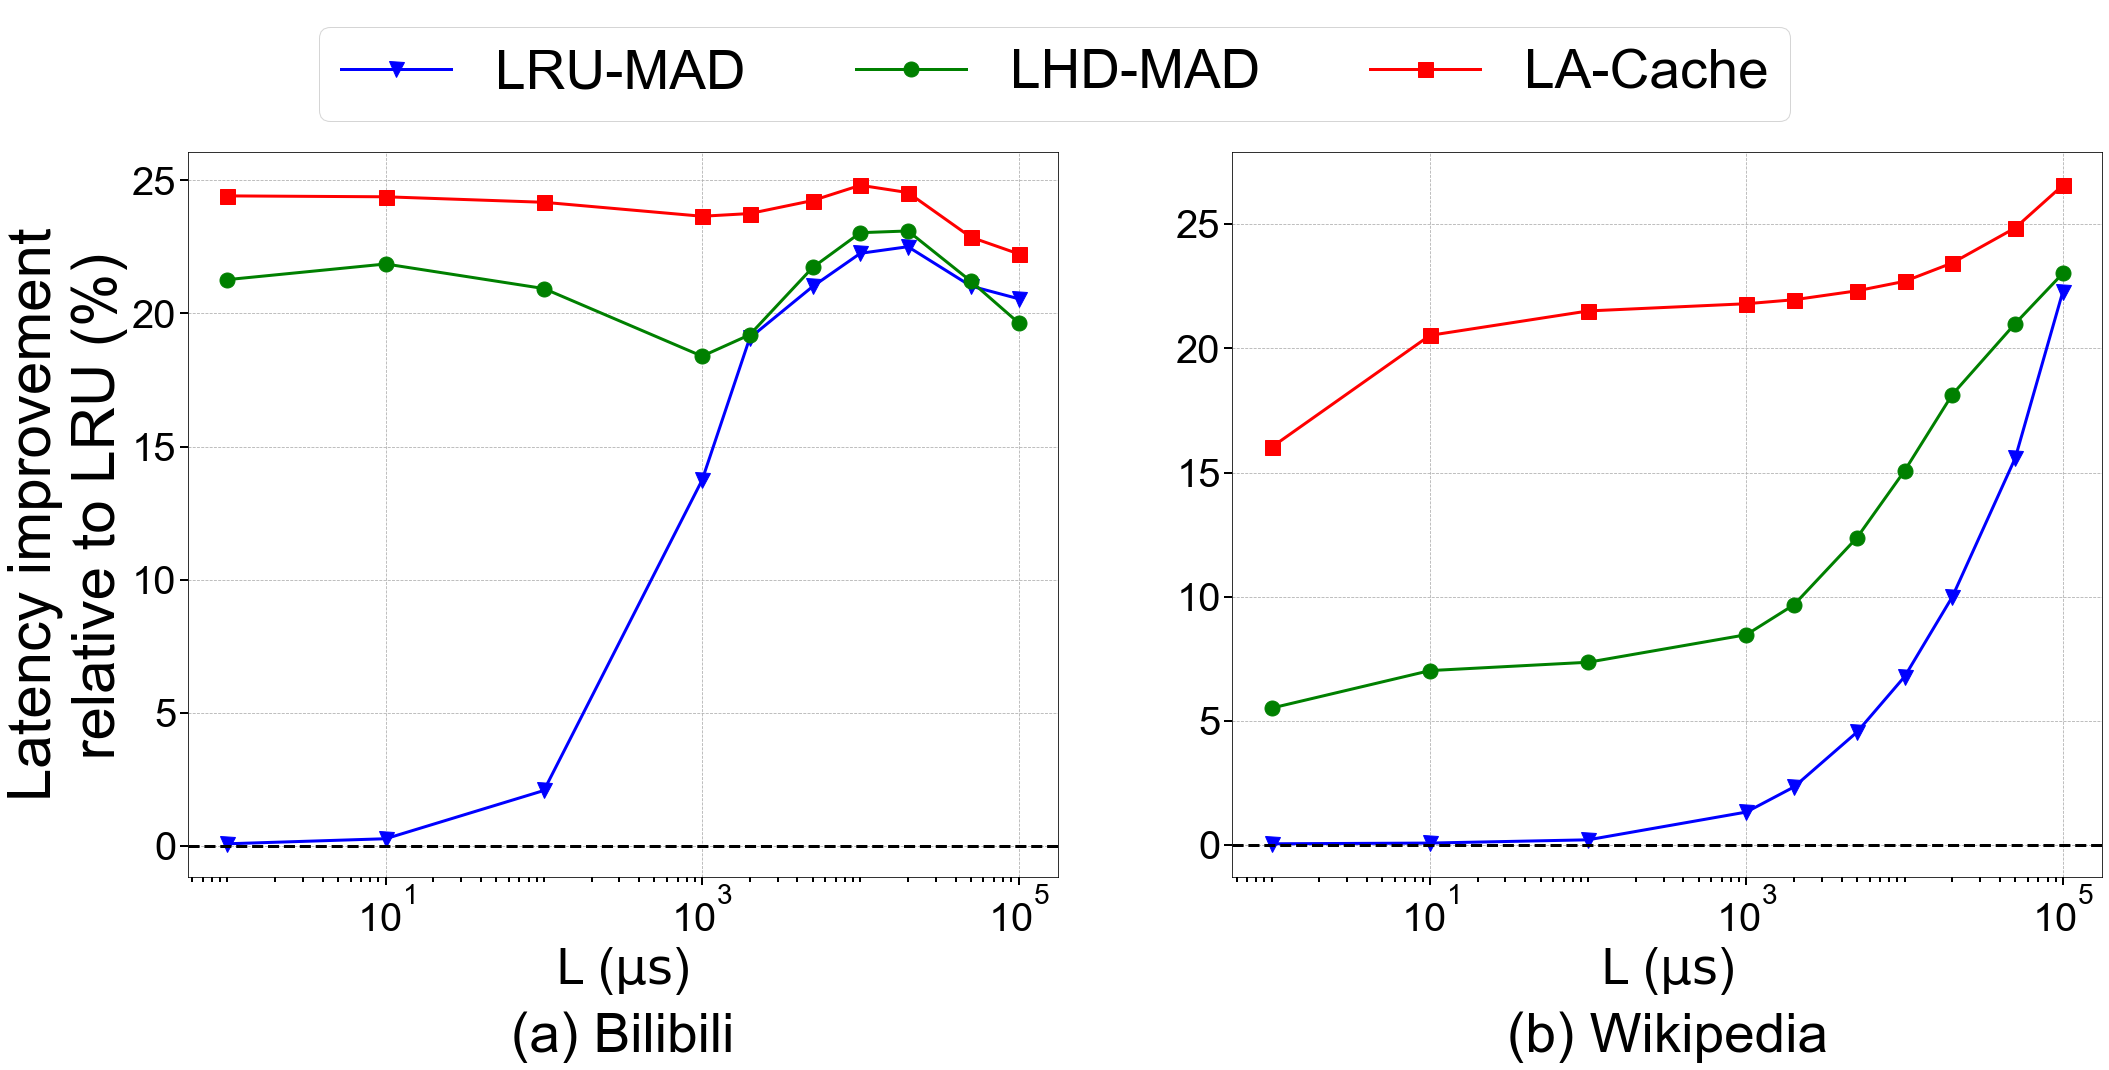

In [16]:
font1 = {"family":'Arial',"weight":'normal','size':50}
font2 = {"family":'Arial',"weight": 'normal', 'size': 60}
font3 = {"family":'Arial',"weight": 'normal', 'size': 55}
Label_Size = 50
Title_Size = 55
fpath = os.path.join(rcParams["datapath"],"fonts/ttf/cmr10.ttf")
prop = fm.FontProperties(fname=fpath)

from pylab import *
MaLen = 8
MiLen = 5
mwith = 2
bwith = 1.7

Dtype = 0 
Relat = -1

CSets = {"LFU":"c","LRU":"brown","LRU-MAD":"b","LHD-MAD":"g","LA-Cache":"r","LHD":"steelblue","2Q":"salmon","LRU-4":"olive","Delay":"m"}
CMarks = {"LRU":"^","LRU-MAD":"v","LHD-MAD":"o","LA-Cache":"s","LHD":"*","2Q":"p","LRU-4":"h","Delay":"d","LFU":"H"}

NameLabel = {"Belady-Size":"BeladyS","Belady":"Belady","LFU":"LFU","LHD":"LHD","LHD-MAD":"LHDAD","LRU-MAD":"LRUAD","LRU":"LRU",
             "LRU-4":"LRUK","LA-Cache":"LA","2Q":"TwoQ","Delay":"AD"}

Labels = ["LRU","LFU","LHD","2Q","LRU-4","Belady","Belady-Size","Delay","PB-Size","LRU-MAD"]

Delays = [1,10,100,1000,2000,5000,10000,20000,50000,100000]

# Configure Cache Size to Draw Plot
CSize = 256
print("Cache Size:",CSize)

fig = plt.figure(figsize=(30,16))

TLabels = ["LRU-MAD","LHD-MAD","LA-Cache"]

CompAl = "LRU"
TLabels.append(CompAl)

TName = "LRU"
if CompAl == "Belady":
    TName = "$\mathrm{B\\'el\\'ady}$"

# first
ax1 = fig.add_subplot(121)

Res = BiliRes
Ys = {}
for l in TLabels:
    Name = NameLabel[l]
    Y = []
    for d in Delays:
        Name2 = Name + "-" + str(CSize) + "-" + str(d)
        Y.append(Res[Name2][Dtype])
    Ys[Name] = Y

GYs = {}
for ky in Ys.keys():
    By = Ys[CompAl]
    Ds = Ys[ky]
    Gy = relative_res(By,Ds,Relat)
    GYs[ky] = Gy

LNs = []
X = Delays    
for i in range(len(TLabels)-1):
    Label = TLabels[i]
    Name = NameLabel[Label]
    Y = GYs[Name]
    Col = CSets[Label]
    mark = CMarks[Label]
    ln = ax1.semilogx(X,Y,color=Col,label=Label,marker=mark,linewidth=3,markersize=15)
    LNs += ln

ax1.set_ylabel("Latency improvement\n relative to " + TName + " (%)",font2)
ax1.set_xlabel("L ($\mathrm{\mu s}$)",font1)
ax1.tick_params(labelsize=Label_Size)
plt.grid(ls='--')
plt.xticks([10,1000,100000],fontproperties = 'Arial',size=40)
plt.yticks(fontproperties = 'Arial',size=40)
plt.axhline(y=0,linestyle="--",linewidth=3,color="k")

x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax1.xaxis.set_minor_locator(x_minor)
ax1.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
tick_params(which='minor',length=MiLen,width=mwith)
tick_params(which='major',length=MaLen,width=mwith)

ax1.set_title("(a) Bilibili",y=-0.25,fontproperties="Arial",fontsize=Title_Size)

fig.legend(LNs, 
           [l.get_label() for l in LNs],
           loc = "upper center",
           ncol = 8,
           prop = font3,
          )


# second
ax2 = fig.add_subplot(122)

Res = WikiRes
Ys = {}
for l in TLabels:
    Name = NameLabel[l]
    Y = []
    for d in Delays:
        Name2 = Name + "-" + str(CSize) + "-" + str(d)
        Y.append(Res[Name2][Dtype])
    Ys[Name] = Y

GYs = {}
for ky in Ys.keys():
    By = Ys[CompAl]
    Ds = Ys[ky]
    Gy = relative_res(By,Ds,Relat)
    GYs[ky] = Gy

LNs = []
X = Delays    
for i in range(len(TLabels)-1):
    Label = TLabels[i]
    Name = NameLabel[Label]
    Y = GYs[Name]
    Col = CSets[Label]
    mark = CMarks[Label]
    ax2.semilogx(X,Y,color=Col,label=Label,marker=mark,linewidth=3,markersize=15)

ax2.set_xscale("log")
ax2.set_xlabel("L ($\mathrm{\mu s}$)",font1)
ax2.tick_params(labelsize=Label_Size)
plt.grid(ls='--')
plt.xticks([10,1000,100000],fontproperties = 'Arial',size=40)
plt.yticks(fontproperties = 'Arial',size=40)
plt.axhline(y=0,linestyle="--",linewidth=3,color="k")

x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax2.xaxis.set_minor_locator(x_minor)
ax2.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
tick_params(which='minor',length=MiLen,width=mwith)
tick_params(which='major',length=MaLen,width=mwith)

ax2.set_title("(b) Wikipedia",y=-0.25,fontproperties="Arial",fontsize=Title_Size)


rcParams.update({'font.size': 30, 'font.family': 'serif'})

fig.tight_layout()

plt.subplots_adjust(top=0.85, wspace=0.2, hspace=0.1)

In [27]:
#-----------------------------------Cache Size Check--------------------------------------

<ipython-input-17-a3d55ab98062>:72: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale("log",basex=2)
<ipython-input-17-a3d55ab98062>:126: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax2.set_xscale("log",basex=2)


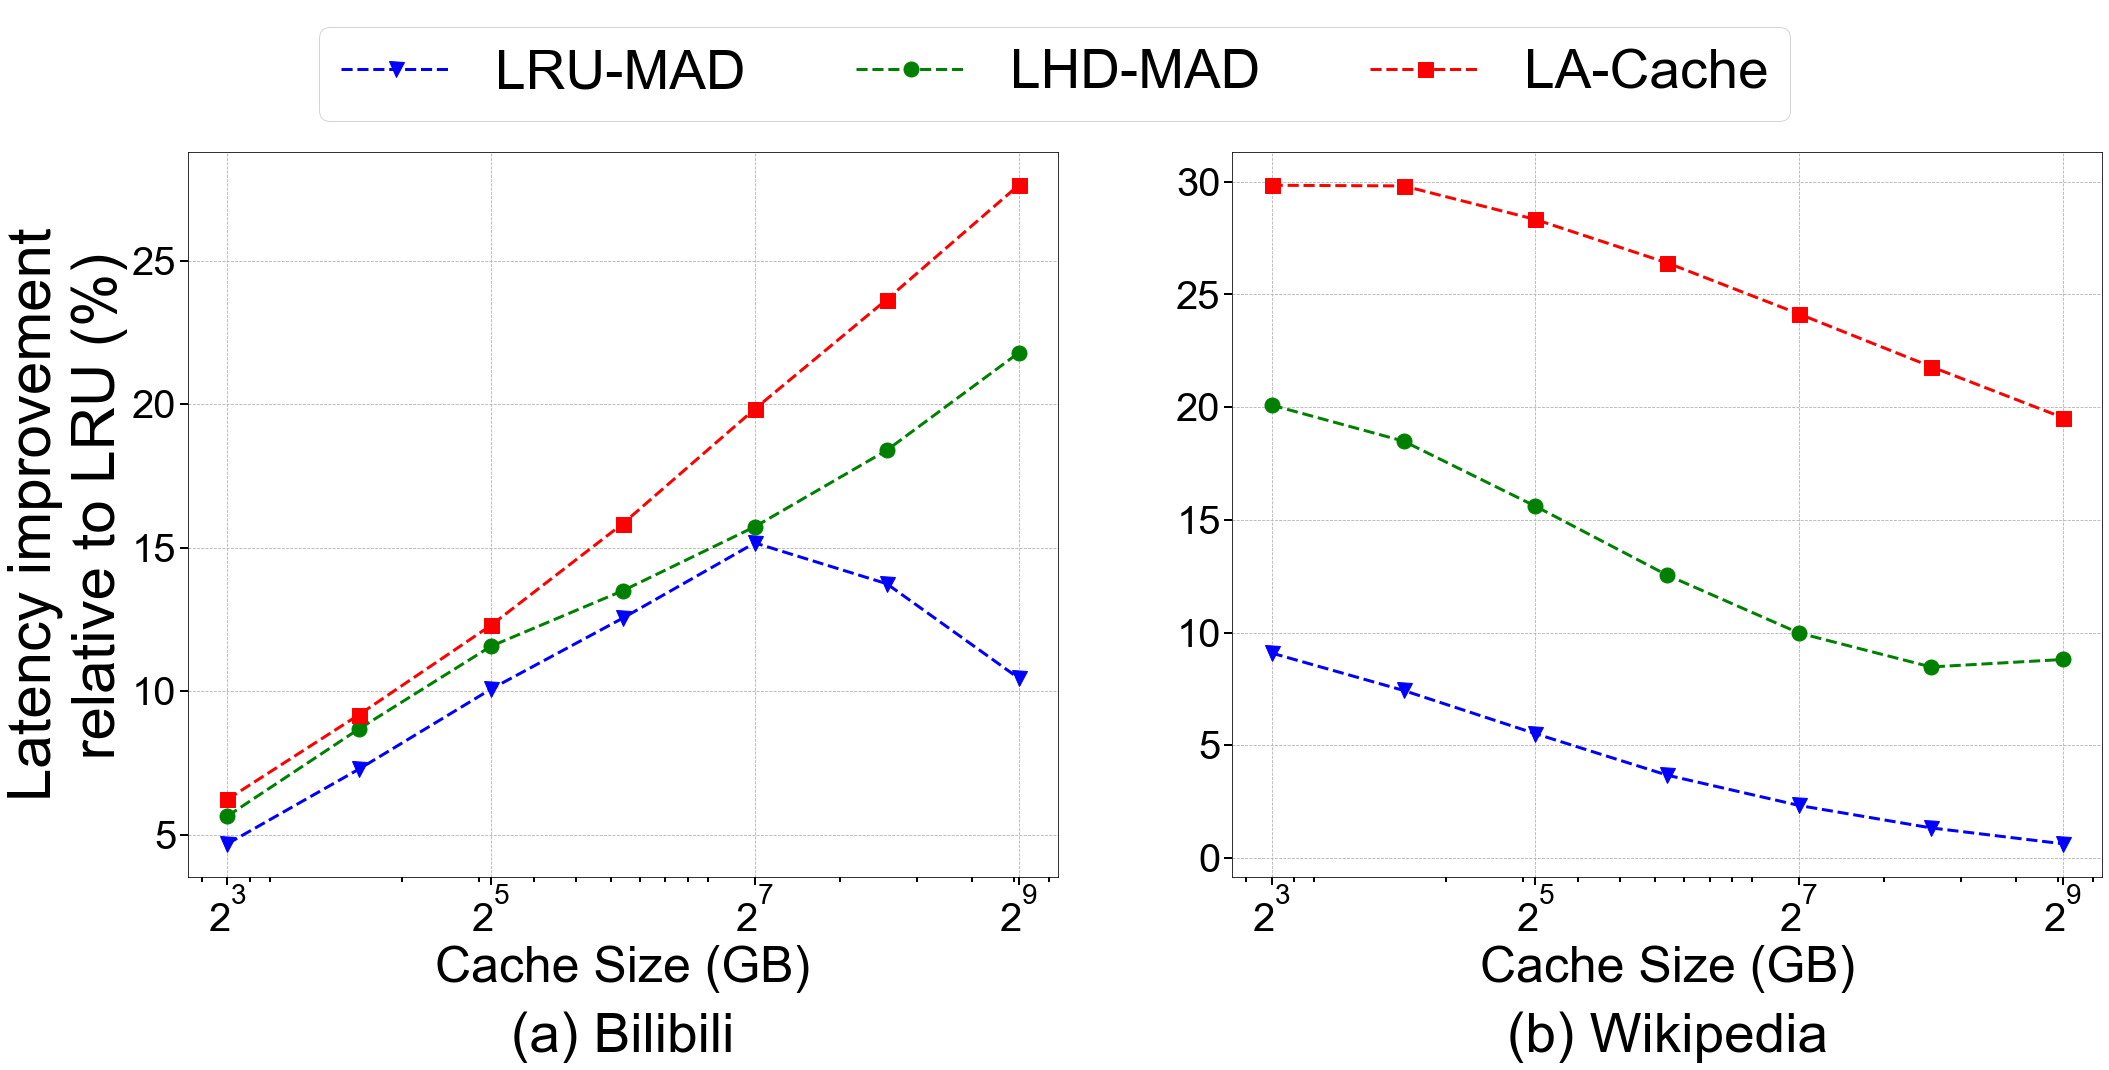

In [17]:
font1 = {"family":'Arial',"weight":'normal','size':50}
font2 = {"family":'Arial',"weight": 'normal', 'size': 60}
font3 = {"family":'Arial',"weight": 'normal', 'size': 55}
Label_Size = 50
Title_Size = 55
fpath = os.path.join(rcParams["datapath"],"fonts/ttf/cmr10.ttf")
prop = fm.FontProperties(fname=fpath)

from pylab import *
MaLen = 8
MiLen = 5
mwith = 2
bwith = 1.7

CSets = {"LFU":"c","LRU":"brown","LRU-MAD":"b","LHD-MAD":"g","LA-Cache":"r","LHD":"steelblue","2Q":"salmon","LRU-4":"olive","Delay":"m"}
CMarks = {"LRU":"^","LRU-MAD":"v","LHD-MAD":"o","LA-Cache":"s","LHD":"*","2Q":"p","LRU-4":"x","Delay":"d","LFU":"H"}

NameLabel = {"Belady-Size":"BeladyS","Belady":"Belady","LFU":"LFU","LHD":"LHD","LHD-MAD":"LHDAD","LRU-MAD":"LRUAD","LRU":"LRU",
             "LRU-4":"LRUKT","LA-Cache":"LA","2Q":"TwoQ","Delay":"AD"}

Labels = ["LRU","LFU","LHD","2Q","LRU-4","Belady","Belady-Size","Delay","PB-Size","LRU-MAD"]


CSizes = [8,16,32,64,128,256,512]

Lat = 1000

fig = plt.figure(figsize=(30,16))

TLabels = ["LRU-MAD","LHD-MAD","LA-Cache"]

CompAl = "LRU"

TLabels.append(CompAl)

TName = "LRU"
if CompAl == "Belady":
    TName = "$\mathrm{B\\'el\\'ady}$"

# first
ax1 = fig.add_subplot(121)

Res = BiliRes
Ys = {}
for l in TLabels:
    Name = NameLabel[l]
    Y = []
    for c in CSizes:
        Name2 = Name + "-" + str(c) + "-" + str(Lat)
        Y.append(Res[Name2][0])
    Ys[Name] = Y

GYs = {}
for ky in Ys.keys():
    By = Ys[CompAl]
    Ds = Ys[ky]
    Gy = relative_res(By,Ds,-1)  
    GYs[ky] = Gy

LNs = []
X = CSizes   
for i in range(len(TLabels)-1):
    Label = TLabels[i]
    Name = NameLabel[Label]
    Y = GYs[Name]
    Col = CSets[Label]
    mark = CMarks[Label]
    ln = ax1.semilogx(X,Y,color=Col,label=Label,marker=mark,linewidth=3,markersize=15,linestyle='--')
    LNs += ln

ax1.set_xscale("log",basex=2)
ax1.set_ylabel("Latency improvement\n relative to " + TName + " (%)",font2)
ax1.set_xlabel("Cache Size (GB)",font1)
ax1.tick_params(labelsize=Label_Size)
plt.grid(ls='--')

plt.xticks([8,32,128,512],fontproperties = 'Arial',size=40)
plt.yticks(fontproperties = 'Arial',size=40)

x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax1.xaxis.set_minor_locator(x_minor)
ax1.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
tick_params(which='minor',length=MiLen,width=mwith)
tick_params(which='major',length=MaLen,width=mwith)

ax1.set_title("(a) Bilibili",y=-0.25,fontproperties="Arial",fontsize=Title_Size)

fig.legend(LNs, 
           [l.get_label() for l in LNs],
           loc = "upper center",
           ncol = 3,
           prop = font3,
          )


# second
ax2 = fig.add_subplot(122)

Res = WikiRes
Ys = {}
for l in TLabels:
    Name = NameLabel[l]
    Y = []
    for c in CSizes:
        Name2 = Name + "-" + str(c) + "-" + str(Lat)
        Y.append(Res[Name2][0])
    Ys[Name] = Y
    
GYs = {}
for ky in Ys.keys():
    By = Ys[CompAl]
    Ds = Ys[ky]
    Gy = relative_res(By,Ds,-1)
    GYs[ky] = Gy

X = CSizes   
for i in range(len(TLabels)-1):
    Label = TLabels[i]
    Name = NameLabel[Label]
    Y = GYs[Name]
    Col = CSets[Label]
    mark = CMarks[Label]
    ax2.semilogx(X,Y,color=Col,label=Label,marker=mark,linewidth=3,markersize=15,linestyle='--')

ax2.set_xscale("log",basex=2)
ax2.set_xlabel("Cache Size (GB)",font1)
ax2.tick_params(labelsize=Label_Size)
plt.grid(ls='--')

plt.xticks([8,32,128,512],fontproperties = 'Arial',size=40)
plt.yticks(fontproperties = 'Arial',size=40)

x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax2.xaxis.set_minor_locator(x_minor)
ax2.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
tick_params(which='minor',length=MiLen,width=mwith)
tick_params(which='major',length=MaLen,width=mwith)

ax2.set_title("(b) Wikipedia",y=-0.25,fontproperties="Arial",fontsize=Title_Size)

rcParams.update({'font.size': 30, 'font.family': 'Arial'})

fig.tight_layout()

plt.subplots_adjust(top=0.85, wspace=0.2, hspace=0.1)



In [18]:
# ----------------------------Burstiness Plots-----------------------------
# you should set the proper paths to Burstiness results and average latency
# For Example:
## Burstiness: "./Example/Burst/"
## Latency: "./Example/AvgLats/"

In [24]:
def load_avglats(path):
    ALs = {}
    with open(path) as fr:
        for f in fr:
            data = f[:-1].split(" ")
            ky = int(data[0])
            val = float(data[1])
            ALs[ky]= val
    
    return ALs

def load_burst(path):
    Bs = {}
    with open(path) as fr:
        count = 0
        for f in fr:
            count += 1
            if count > 1:
                data = f[:-1].split(" ")
                name = int(data[0])
                b = float(data[2])
                if b > 1:
                    b = 1
                Bs[name] = b

    return Bs

def relative_vals(Base,New,X):
    Res = []
    NewX = []
    for i in range(len(Base)):
        b = Base[i]
        n = New[i]
        res = (b-n)/b * 100
        if res >= -100:
            Res.append(res)
            NewX.append(X[i])

    return NewX,Res

def get_draws(Name,CSize=256):
    Algos = ["LRUADCache","LHDADCache","LRUCache","LACache"]
    Datas = {}
    
    PBusrt = "./Example/Burst/" + Name + "_b.txt"
    Bs = load_burst(PBusrt)

    for algo in Algos:
        PLats = "./Example/AvgLats/" + Name + "//" + algo + "_" + str(CSize) +".txt"
        MLTs = load_avglats(PLats)

        Xs = []
        Ys = []
        VLen = int(len(Bs) * 1)
        for ky in list(Bs.keys())[:VLen]:
            Xs.append(Bs[ky])
            Ys.append(MLTs[ky])

            
        Datas[algo] = [Xs,Ys]

    Base = Datas["LRUCache"][1]
    ResDatas = {}
    for algo in Algos:
        if algo != "LRUCache":
            New = Datas[algo][1]
            NewX,ReVal = relative_vals(Base,New,Datas[algo][0])
            ResDatas[algo] = [NewX,ReVal]
    
    return ResDatas


Cache Size: 256
Bilibili
Wikipedia


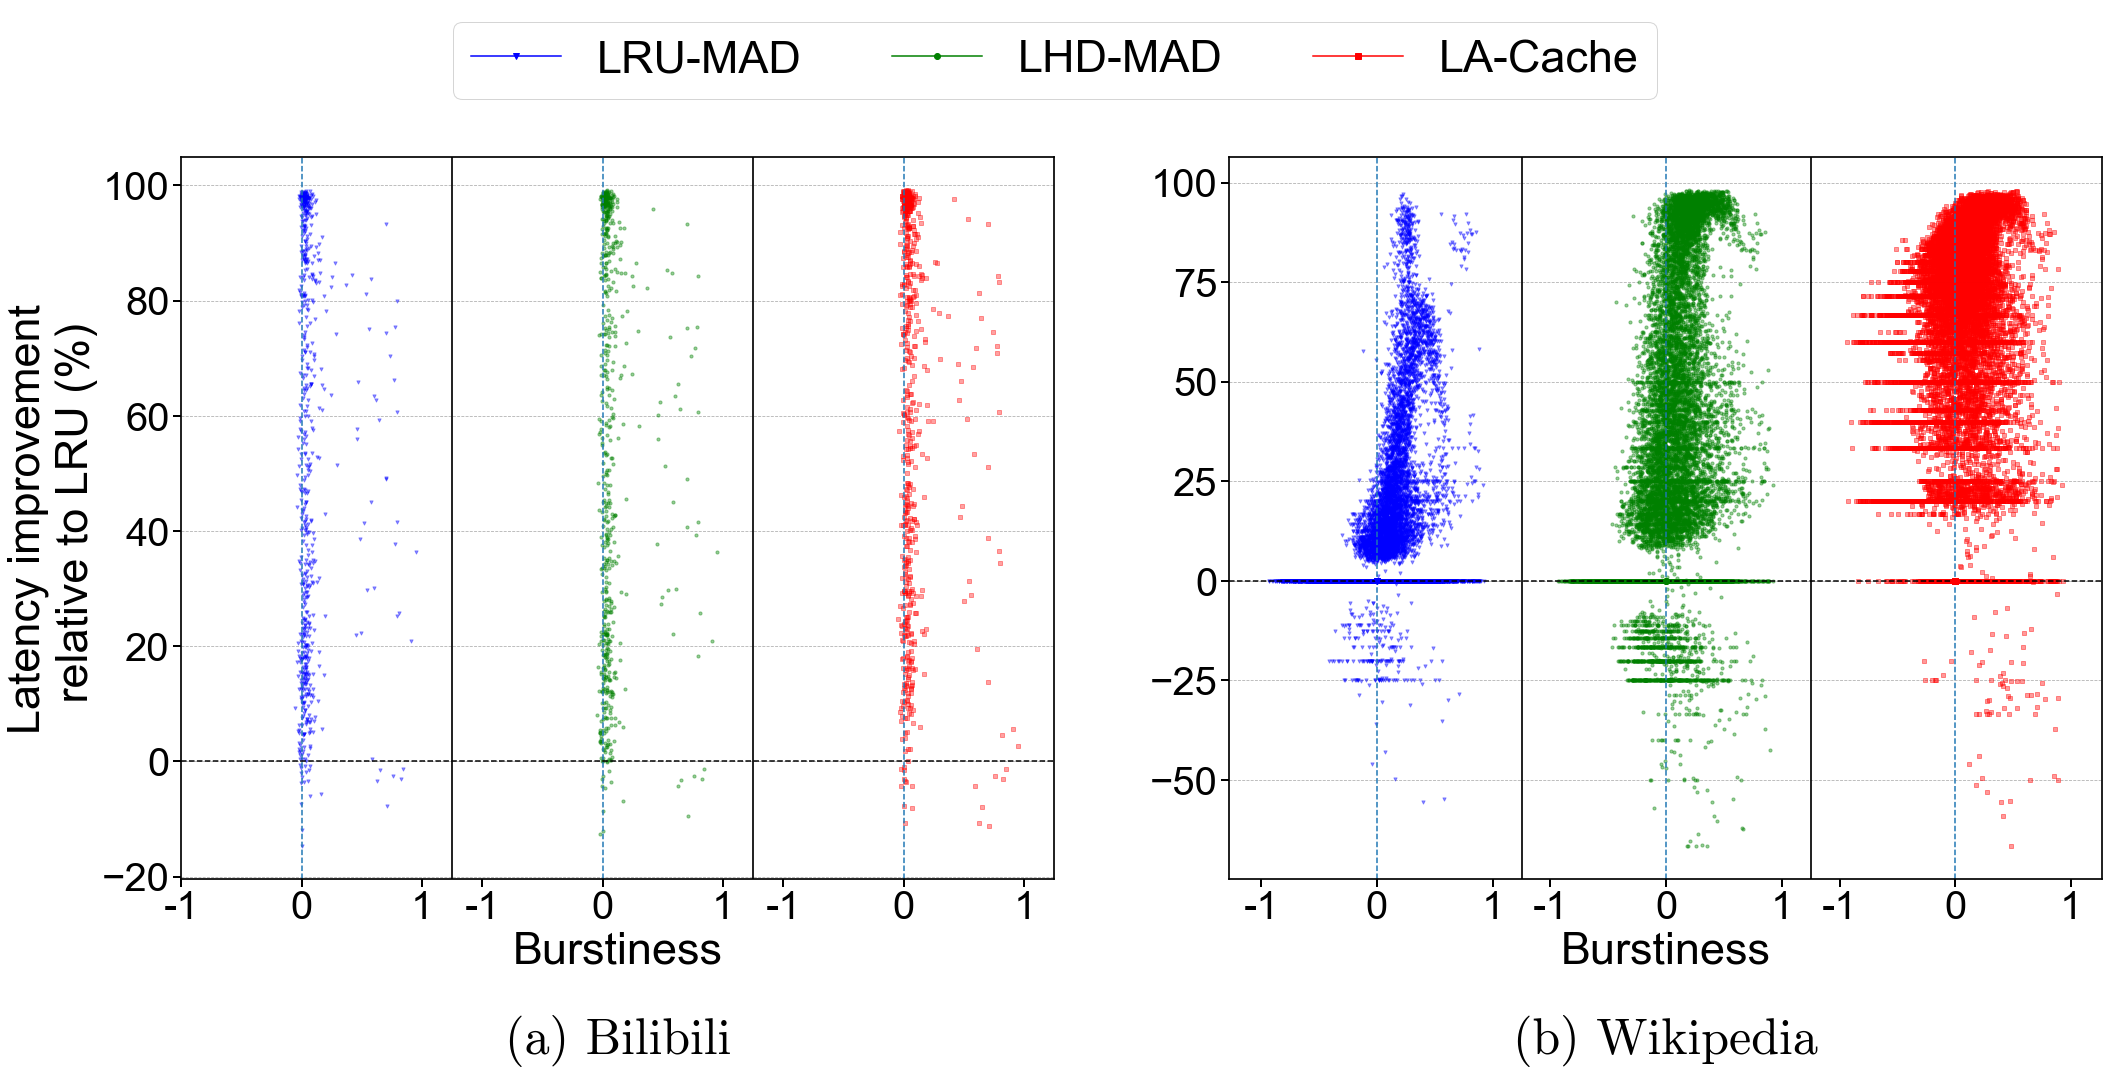

In [32]:
plt.rc('axes', axisbelow=True)
font1 = {"family":'Arial',"weight":'normal','size':45}
font2 = {"family":'Arial',"weight": 'normal', 'size': 45}
font3 = {"family":'Arial',"weight": 'normal', 'size': 45}
Label_Size = 30
Title_Size = 50
fpath = os.path.join(rcParams["datapath"],"fonts/ttf/cmr10.ttf")
prop = fm.FontProperties(fname=fpath)

from pylab import *
MaLen = 8
MiLen = 5
mwith = 2
bwith = 1.7

CSets = {"LRU":"brown","LRU-MAD":"b","LHD-MAD":"g","LA-Cache":"r","LHD":"steelblue","2Q":"salmon","LRU-4":"yellowgreen","Delay":"m"}
CMarks = {"LRU":"^","LRU-MAD":"v","LHD-MAD":"o","LA-Cache":"s","LHD":"*","2Q":"h","LRU-4":"x","Delay":"d"}

Labels = ["LRU","LRU-MAD","LHD-MAD","LA-Cache"]
Colors = []
Markers = []
for l in Labels:
    Colors.append(CSets[l])
    Markers.append(CMarks[l])

    
# Configure Cache Size to Draw Plot
CSize = 256
print("Cache Size:",CSize)

Names = ["Bilibili","Wikipedia"]
AllDatas = {}
for ky in Names:
    Datas = get_draws(ky,CSize)
    AllDatas[ky] = Datas
    print(ky)
    
fig = plt.figure(figsize=(30,16))

#first
ax1 = fig.add_subplot(121)

Add = 2.5

Datas = AllDatas["Bilibili"]

AxY = []

GDatas = Datas["LRUADCache"]

X = np.array(GDatas[0]) + Add * 0
Y = GDatas[1]

Ymin = 1000
Ymax = -1000

if max(Y) > Ymax:
    Ymax = max(Y)
if min(Y) < Ymin:
    Ymin = min(Y)

ax1.scatter(X,Y,s=10,alpha=0.4,c=Colors[1],marker=Markers[1])

AxY.append(np.mean(Y))

GDatas = Datas["LHDADCache"]

X = np.array(GDatas[0]) + Add * 1
Y = GDatas[1]

if max(Y) > Ymax:
    Ymax = max(Y)
if min(Y) < Ymin:
    Ymin = min(Y)

ax1.scatter(X,Y,s=10,alpha=0.4,c=Colors[2],marker=Markers[2])

AxY.append(np.mean(Y))

GDatas = Datas["LACache"]

X = np.array(GDatas[0]) + Add * 2
Y = GDatas[1]

if max(Y) > Ymax:
    Ymax = max(Y)
if min(Y) < Ymin:
    Ymin = min(Y)

ax1.scatter(X,Y,s=10,alpha=0.37,c=Colors[3],marker=Markers[3])

AxY.append(np.mean(Y))

ax1.set_xlabel("Burstiness",font1)
ax1.set_ylabel("Latency improvement\n relative to LRU (%)",font2)
ax1.tick_params(labelsize=Label_Size)

Os = [0,Add,Add*2]
Xs = []
Ys = []
for o in Os:
    xs = [o,o-1,o+1]
    ys = ["0",'-1',"1"]
    Xs += xs
    Ys += ys

ax1.set_xticks(Xs)
ax1.set_xticklabels(Ys)

plt.xticks(fontproperties = 'Arial',size=40)
plt.yticks(fontproperties = 'Arial',size=40)

plt.grid(axis='y',linestyle="--")
for o in Os:
    ax1.axvline(o,linestyle="--")

ax1.axhline(0, linestyle='--', color='k')
ax1.axvline(Add/2, linestyle='-', color='k',linewidth=bwith)
ax1.axvline(Add*1.5, linestyle='-', color='k',linewidth=bwith)
tick_params(which='major',length=MaLen,width=mwith)
ax1.spines['bottom'].set_linewidth(bwith)
ax1.spines['left'].set_linewidth(bwith)
ax1.spines['top'].set_linewidth(bwith)
ax1.spines['right'].set_linewidth(bwith)

ax1.set_title("(a) Bilibili",y=-0.25,fontproperties=prop,fontsize=Title_Size)

    
# second
ax2 = fig.add_subplot(122)

Add = 2.5

Datas = AllDatas["Wikipedia"]


Ymin = 1000
Ymax = -1000

AxY = []

GDatas = Datas["LRUADCache"]

X = np.array(GDatas[0]) + Add * 0
Y = GDatas[1]

if max(Y) > Ymax:
    Ymax = max(Y)
if min(Y) < Ymin:
    Ymin = min(Y)
    

ax2.scatter(X,Y,s=10,alpha=0.4,c=Colors[1],marker=Markers[1])

AxY.append(np.mean(Y))

GDatas = Datas["LHDADCache"]

X = np.array(GDatas[0]) + Add * 1
Y = GDatas[1]

if max(Y) > Ymax:
    Ymax = max(Y)
if min(Y) < Ymin:
    Ymin = min(Y)

ax2.scatter(X,Y,s=10,alpha=0.4,c=Colors[2],marker=Markers[2])

AxY.append(np.mean(Y))

GDatas = Datas["LACache"]

X = np.array(GDatas[0]) + Add * 2
Y = GDatas[1]

if max(Y) > Ymax:
    Ymax = max(Y)
if min(Y) < Ymin:
    Ymin = min(Y)
    
ax2.scatter(X,Y,s=10,alpha=0.4,c=Colors[3],marker=Markers[3])

AxY.append(np.mean(Y)) 

ax2.set_xlabel("Burstiness",font1)
ax2.tick_params(labelsize=Label_Size)

Os = [0,Add,Add*2]
Xs = []
Ys = []
for o in Os:
    xs = [o,o-1,o+1]
    ys = ["0",'-1',"1"]
    Xs += xs
    Ys += ys


ax2.set_xticks(Xs)
ax2.set_xticklabels(Ys)

plt.xticks(fontproperties = 'Arial',size=40)
plt.yticks(fontproperties = 'Arial',size=40)

plt.grid(axis='y',linestyle="--")
for o in Os:
    ax2.axvline(o,linestyle="--")

ax2.axhline(0, linestyle='--', color='k')
ax2.axvline(Add/2, linestyle='-', color='k',linewidth=bwith)
ax2.axvline(Add*1.5, linestyle='-', color='k',linewidth=bwith)
tick_params(which='major',length=MaLen,width=mwith)
ax2.spines['bottom'].set_linewidth(bwith)
ax2.spines['left'].set_linewidth(bwith)
ax2.spines['top'].set_linewidth(bwith)
ax2.spines['right'].set_linewidth(bwith)

ax2.set_title("(b) Wikipedia",y=-0.25,fontproperties=prop,fontsize=Title_Size)

LNs = []
for i in range(3):
    ln = ax2.plot([Add*i,Add*i+0.00001],[0,0.0001],marker=Markers[i+1],color=Colors[i+1],label=Labels[i+1])
    LNs.append(ln)

rcParams.update({'font.size': 30, 'font.family': 'Arial'})

fig.legend(
        loc = "upper center",
        ncol = 3,
        prop = font3,
    )

fig.tight_layout()

plt.subplots_adjust(top=0.85, wspace=0.2, hspace=0.1)



In [ ]:
# ------------------------------CDF of Inter-arrival Time---------------------------
# 

In [34]:
def load_trace(path):
    Trace = []
    with open(path) as fr:
        for f in fr:
            data = f[:-1].split(";")
            Time = float(data[0])
            Id = int(data[1])
            Size = int(data[2])
            Trace.append([Time,Id,Size])
    return Trace


def box_plot(Datas):
    Gap = 1 / 20
    Freqs = {}
    for i in range(len(Datas)):
        data = Datas[i]
        for j in range(21):
            interv = j / 20
            if abs(data - interv) <= Gap / 2:
                if interv not in Freqs.keys():
                    Freqs[interv] = 1
                else:
                    Freqs[interv] += 1

    Xs = sorted(list(Freqs.keys()))

    L = len(Datas)
    Ys = []
    CDF = 0
    STs = {}
    for x in Xs:
        Prob = Freqs[x] / L
        CDF += Prob
        Ys.append(CDF)
        STs[x] = Freqs[x]

    return Xs,Ys


def gen_poisson(Lambda,Num):
    Reqs = []
    for i in range(Num):
        Rd = rd.expovariate(Lambda)
        Reqs.append(Rd)
    return Reqs



def analysis(Trace,CIDs):
    Times = {}
    for i in range(len(Trace)):
        req = Trace[i]
        Time = req[0]
        Id = req[1]
        if Id not in Times.keys():
            Times[Id] = [Time]
        else:
            Times[Id].append(Time)

    Inters = {}
    for ky in Times.keys():
        GTimes = Times[ky]
        if len(GTimes) > 1:
            inters = []
            for i in range(len(GTimes)-1):
                inter = GTimes[i+1] - GTimes[i]
                inters.append(inter)
            Inters[ky] = inters

    GenDatas = {}
    for ky in CIDs:
        Glambda = np.mean(Inters[ky])
        Num = len(Inters[ky])
        GDatas = []
        TVal = 1.0
        for i in range(1):
            Gets = gen_poisson(Glambda,Num)
            Test = ks_2samp(Inters[ky], Gets)
            if Test[1] < TVal:
                GDatas = Gets
                TVal = Test[1]
        GenDatas[ky] = GDatas

    for ky in CIDs:
        Test = ks_2samp(Inters[ky],GenDatas[ky])
        print(ky,Test)

    Rs = {}
    Gs = {}
    for ky in CIDs:
        Real = Inters[ky]
        Gen = GenDatas[ky]
        Min1 = min(Real)
        Max1 = max(Real)

        Min2 = min(Gen)
        Max2 = max(Gen)

        PReal = []
        PGen = []

        for i in range(len(Real)):
            val1 = (Real[i] - Min1) / (Max1 - Min1)
            PReal.append(val1)
            
        for i in range(len(Gen)):
            val2 = (Gen[i]  - Min2) / (Max2 - Min2)
            PGen.append(val2)

        X1,Y1 = box_plot(PReal)
        X2,Y2 = box_plot(PGen)

        Rs[ky] = [X1,Y1]
        Gs[ky] = [X2,Y2]
    
    return Rs, Gs

In [35]:
TrRoot = "./Example/Traces/"

CIDs = {"Bilibili":[10], "Wikipedia":[10]}

Name = "Bilibili"
Gids = CIDs[Name]
Path = TrRoot + Name + ".csv"
Trace = load_trace(Path)
Rs1,Gs1 = analysis(Trace,Gids)
Kys1 = Gids

Name = "Wikipedia"
Gids = CIDs[Name]
Path = TrRoot + Name + ".csv"
Trace = load_trace(Path)
Rs2,Gs2 = analysis(Trace,Gids)
Kys2 = Gids

10 KstestResult(statistic=1.0, pvalue=0.0)
10 KstestResult(statistic=1.0, pvalue=0.0)


<ipython-input-36-8892e82eec23>:80: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(


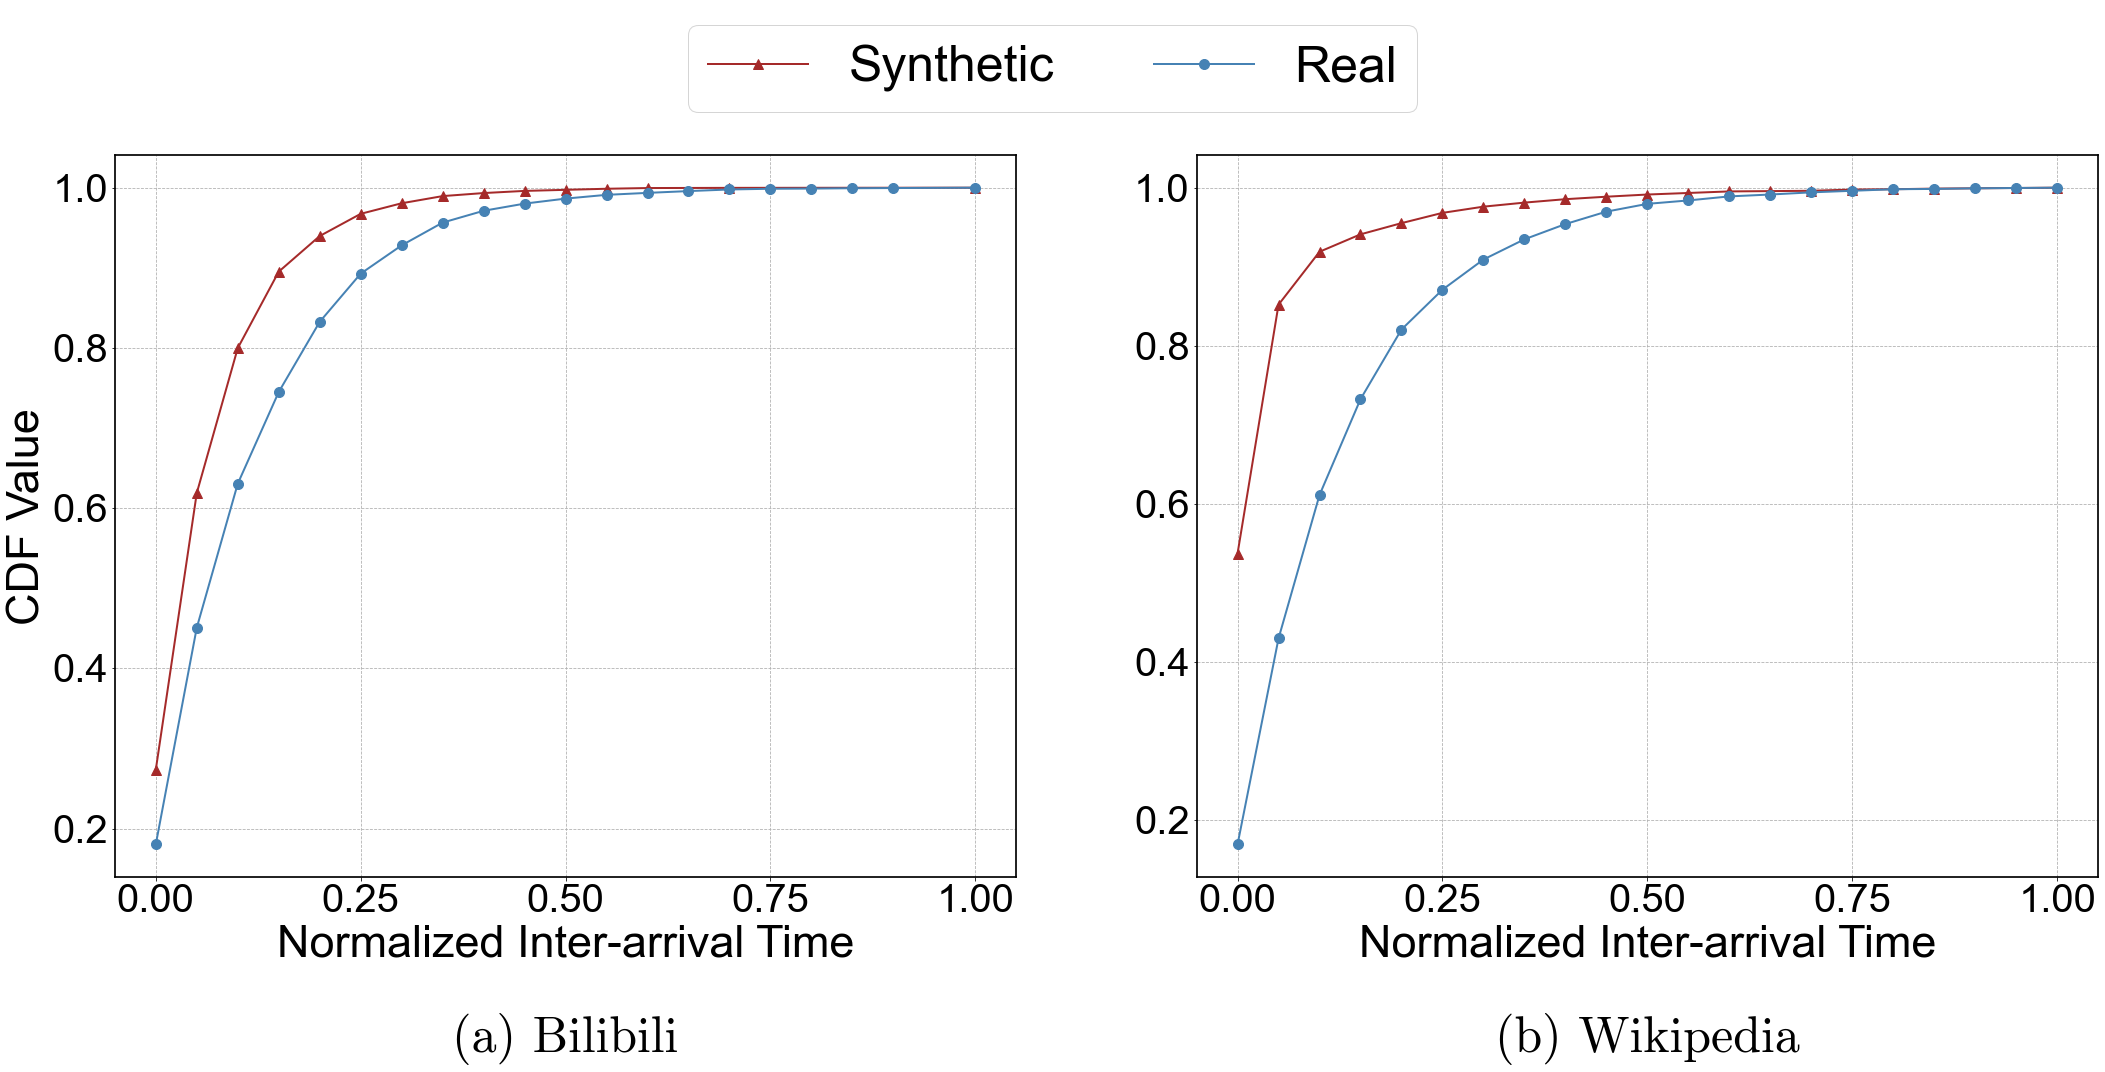

In [36]:
font1 = {"family":'Arial',"weight":'normal','size':45}
font2 = {"family":'Arial',"weight": 'normal', 'size': 45}
font3 = {"family":'Arial',"weight": 'normal', 'size': 50}
Label_Size = 40
Title_Size = 50
fpath = os.path.join(rcParams["datapath"],"fonts/ttf/cmr10.ttf")
prop = fm.FontProperties(fname=fpath)

from pylab import *
MaLen = 8
MiLen = 5
mwith = 2
bwith = 1.7

CSets = {"LRU":"brown","LRU-MAD":"b","LHD-MAD":"g","LA-Cache":"r","LHD":"steelblue","2Q":"salmon","LRU-4":"yellowgreen","Delay":"m"}
CMarks = {"LRU":"^","LRU-MAD":"v","LHD-MAD":"o","LA-Cache":"s","LHD":"*","2Q":"h","LRU-4":"x","Delay":"d"}

Colors = ["brown","steelblue"]
Markers = ["^","o"]
Labels = ["Synthetic","Real"]

fig = plt.figure(figsize=(30,16))

#first
ax1 = fig.add_subplot(121)

X1 = Rs1[Kys1[0]][0]
Y1 = Rs1[Kys1[0]][1]
X2 = Gs1[Kys1[0]][0]
Y2 = Gs1[Kys1[0]][1]

ln1 = ax1.plot(X1,Y1,color=Colors[0],label="Real",linewidth=2,marker=Markers[0],markersize=10)
ln2 = ax1.plot(X2,Y2,color=Colors[1],label="Synthetic",linewidth=2,marker=Markers[1],markersize=10)
LNs = [ln1,ln2]

ax1.set_ylabel("CDF Value",font2)
ax1.set_xlabel("Normalized Inter-arrival Time",font1)
ax1.tick_params(labelsize=Label_Size)
plt.grid(linestyle="--")

plt.xticks([0.0,0.25,0.50,0.75,1.0],fontproperties = 'Arial',size=40)
plt.yticks([0.2,0.4,0.6,0.8,1.0],fontproperties = 'Arial',size=40)

ax1.spines['bottom'].set_linewidth(bwith)
ax1.spines['left'].set_linewidth(bwith)
ax1.spines['top'].set_linewidth(bwith)
ax1.spines['right'].set_linewidth(bwith)

ax1.set_title("(a) Bilibili",y=-0.25,fontproperties=prop,fontsize=Title_Size)



#second
ax2 = fig.add_subplot(122)

X1 = Rs2[Kys2[0]][0]
Y1 = Rs2[Kys2[0]][1]
X2 = Gs2[Kys2[0]][0]
Y2 = Gs2[Kys2[0]][1]

ln1 = ax2.plot(X1,Y1,color=Colors[0],label="Real",linewidth=2,marker=Markers[0],markersize=10)
ln2 = ax2.plot(X2,Y2,color=Colors[1],label="Synthetic",linewidth=2,marker=Markers[1],markersize=10)

ax2.set_xlabel("Normalized Inter-arrival Time",font1)
ax2.tick_params(labelsize=Label_Size)
plt.grid(linestyle="--")

plt.xticks([0.0,0.25,0.50,0.75,1.0],fontproperties = 'Arial',size=40)
plt.yticks([0.2,0.4,0.6,0.8,1.0],fontproperties = 'Arial',size=40)

ax2.spines['bottom'].set_linewidth(bwith)
ax2.spines['left'].set_linewidth(bwith)
ax2.spines['top'].set_linewidth(bwith)
ax2.spines['right'].set_linewidth(bwith)

ax2.set_title("(b) Wikipedia",y=-0.25,fontproperties=prop,fontsize=Title_Size)

fig.legend(
        LNs,
        labels = Labels,
        loc = "upper center",
        ncol = 6,
        prop = font3,
    )

fig.tight_layout()

plt.subplots_adjust(top=0.85, wspace=0.2, hspace=0.1)




In [ ]:
# --------------------------------Average Latency---------------------------------


In [37]:
def load_data(path):
    Datas = {"E1":[],"E3":[],"E2":0,"E4":0}
    with open(path) as fr:
        for f in fr:
            data = f[:-1].split(" ")
            name = data[0]
            gdata = float(data[-1])
            if name == "E1" or name == "E3":
                Datas[name].append(gdata)
            else:
                Datas[name] = gdata

    return Datas


def get_draws(Name,D=100):
    Types = ["all","zipf","empi","genempi"]
    Res = {}

    RPath = "./Example/Verify/" + Name + "_" + str(D) + "l"
    for ty in Types:
        P1 = RPath + "_" + ty + ".txt"
        res = load_data(P1)
        Res[ty] = res

    return Res

['Theory', 'E-synthetic', 'E-real']


<ipython-input-38-1b820ca95969>:160: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(


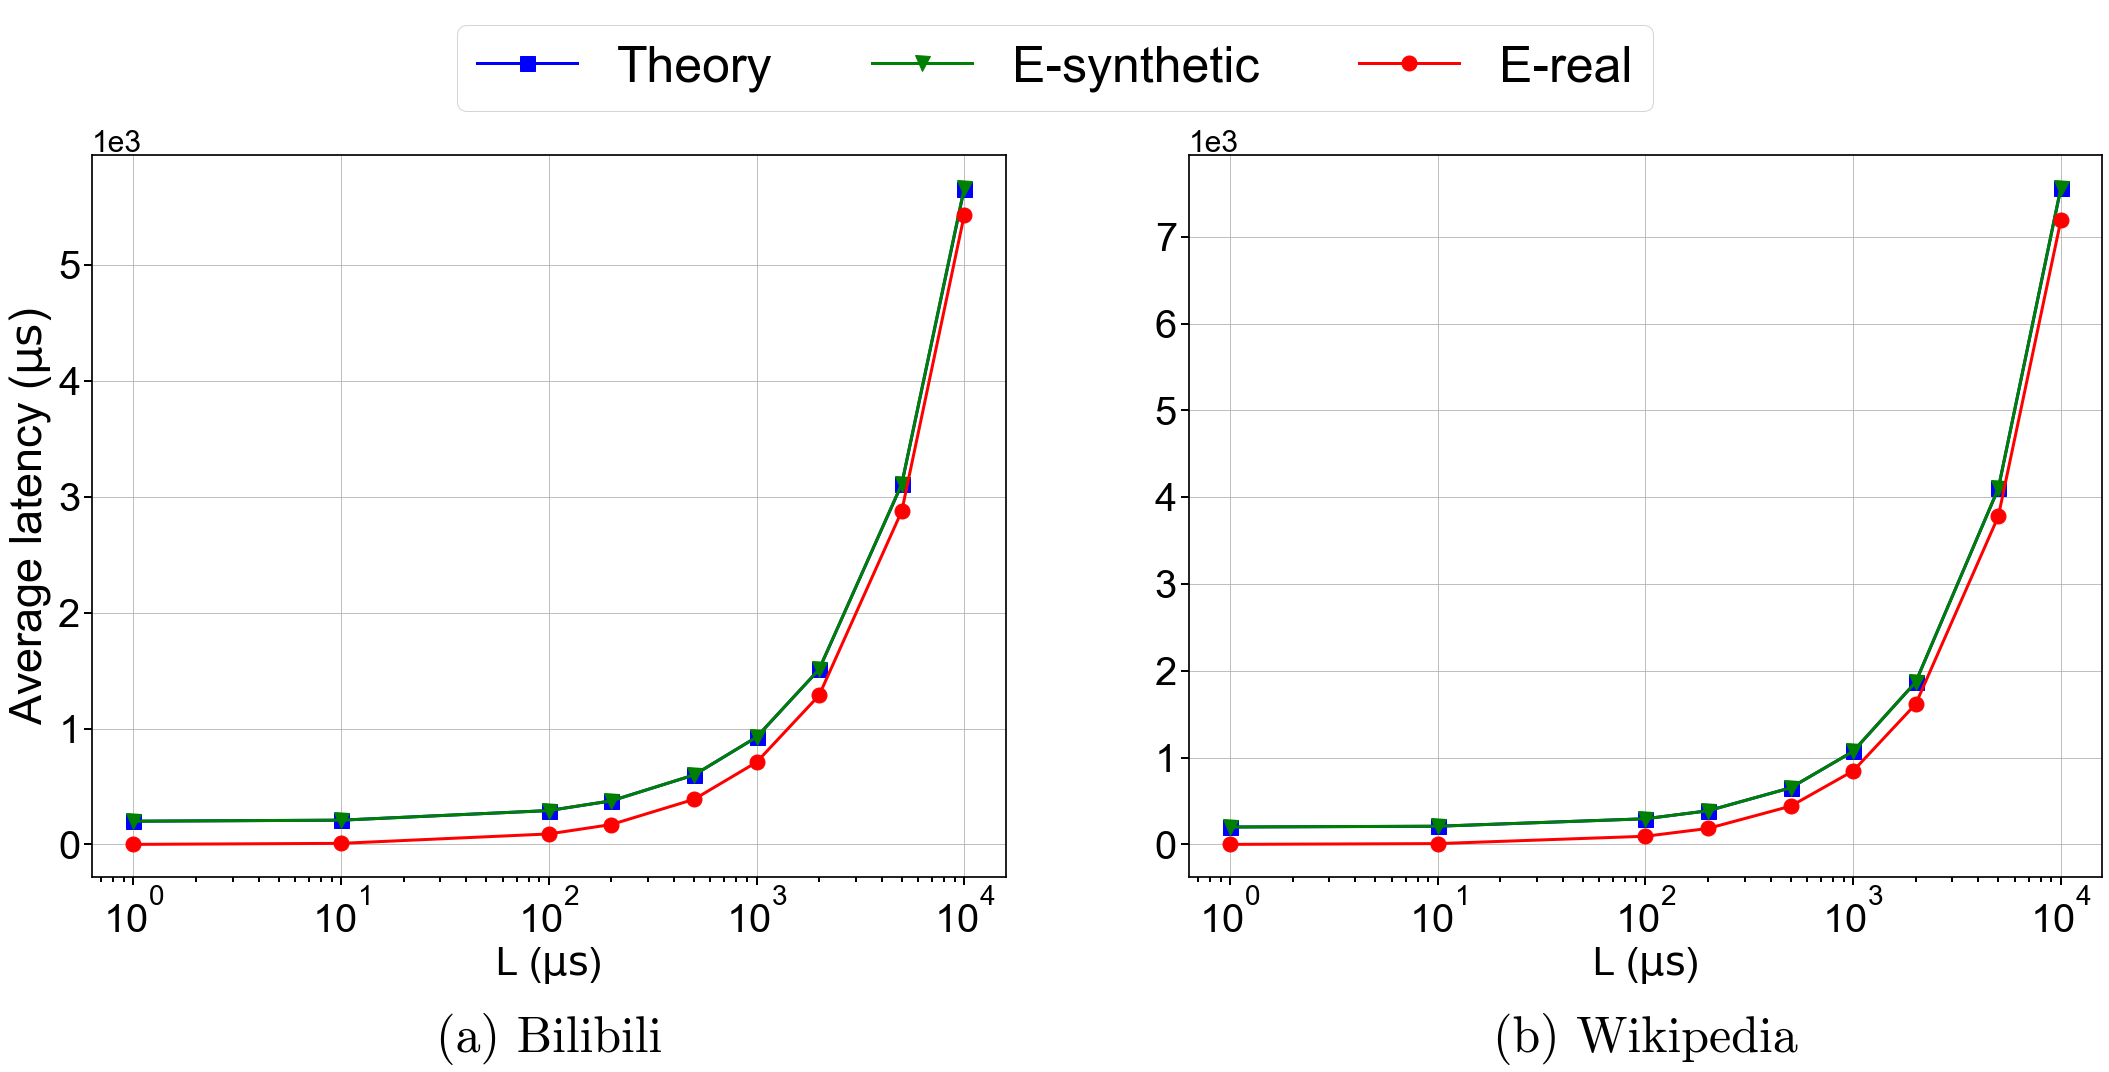

In [38]:
font1 = {"family":'Arial',"weight":'normal','size':40}
font2 = {"family":'Arial',"weight": 'normal', 'size': 45}
font3 = {"family":'Arial',"weight": 'normal', 'size': 50}
Label_Size = 40
Title_Size = 50
fpath = os.path.join(rcParams["datapath"],"fonts/ttf/cmr10.ttf")
prop = fm.FontProperties(fname=fpath)

from pylab import *
MaLen = 8
MiLen = 5
mwith = 2
bwith = 1.7


Names = ["caca","iqiyi","osdi","wiki","vod","8_0"]

FNames1 = ["all","genempi","empi"]
FNames2 = ["all","zipf","empi"]

LABs = {"all":"Theory","genempi":"E-synthetic","empi":"E-real","zipf":"Z-Est"}

Delays = [1, 10,100,200,500,1000,2000,5000,10000]
Add = 200
FNames = FNames1

Markers = ["s","v","o"]

Colors = ['b','g','r']
Labels = []
for l in FNames:
    Labels.append(LABs[l])

print(Labels)

    
##--------------------------------------作图------------------------------------
fig = plt.figure(figsize=(30,16))


# second
ax1 = fig.add_subplot(121)

Name = "Bilibili"

Datas1 = {}
Datas2 = {}
Datas3 = {}

for d in Delays:
    Datas = get_draws(Name,d)
    Data1 = Datas[FNames[0]]
    Data2 = Datas[FNames[1]]
    Data3 = Datas[FNames[2]]
    Datas1[d] = Data1
    Datas2[d] = Data2
    Datas3[d] = Data3

V1 = []
V2 = []
V3 = []


for d in Delays:
    V1.append(Datas1[d]["E4"])
    V2.append(Datas2[d]["E4"])
    V3.append(Datas3[d]["E4"])

V1 = list(np.array(V1)+Add)
V2 = list(np.array(V2)+Add)

V = [V1,V2,V3]
    
X = Delays

LNs = []
for i in range(len(V)):
    ln = ax1.semilogx(X,V[i],Colors[i],label=Labels[i],linewidth=3,marker=Markers[i],markersize=15)
    LNs.append(ln)

ax1.set_xlabel("L ($\mathrm{\mu s}$)",font1)
ax1.set_ylabel("Average latency ($\mathrm{\mu s}$)",font2)
ax1.tick_params(labelsize=Label_Size)
ax1.yaxis.get_major_formatter().set_powerlimits((0,1))
plt.grid()
plt.xticks([1,10,100,1000,10000],fontproperties = 'Arial',size=40)
plt.yticks(fontproperties = 'Arial',size=40)

x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax1.xaxis.set_minor_locator(x_minor)
ax1.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
tick_params(which='minor',length=MiLen,width=mwith)
tick_params(which='major',length=MaLen,width=mwith)
ax1.spines['bottom'].set_linewidth(bwith)
ax1.spines['left'].set_linewidth(bwith)
ax1.spines['top'].set_linewidth(bwith)
ax1.spines['right'].set_linewidth(bwith)

ax1.set_title("(a) Bilibili",y=-0.25,fontproperties=prop,fontsize=Title_Size)


# second
ax2 = fig.add_subplot(122)

Name = "Wikipedia"

Datas1 = {}
Datas2 = {}
Datas3 = {}

for d in Delays:
    Datas = get_draws(Name,d)
    Data1 = Datas[FNames[0]]
    Data2 = Datas[FNames[1]]
    Data3 = Datas[FNames[2]]
    Datas1[d] = Data1
    Datas2[d] = Data2
    Datas3[d] = Data3

V1 = []
V2 = []
V3 = []

for d in Delays:
    V1.append(Datas1[d]["E4"])
    V2.append(Datas2[d]["E4"])
    V3.append(Datas3[d]["E4"])

V1 = list(np.array(V1)+Add)
V2 = list(np.array(V2)+Add)
V = [V1,V2,V3]
    
X = Delays

for i in range(len(V)):
    ax2.semilogx(X,V[i],Colors[i],label=Labels[i],linewidth=3,marker=Markers[i],markersize=15)

ax2.set_xlabel("L ($\mathrm{\mu s}$)",font1)
ax2.tick_params(labelsize=Label_Size)
ax2.yaxis.get_major_formatter().set_powerlimits((0,1))
plt.grid()
plt.xticks([1,10,100,1000,10000],fontproperties = 'Arial',size=40)
plt.yticks(fontproperties = 'Arial',size=40)

x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax2.xaxis.set_minor_locator(x_minor)
ax2.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
tick_params(which='minor',length=MiLen,width=mwith)
tick_params(which='major',length=MaLen,width=mwith)
ax2.spines['bottom'].set_linewidth(bwith)
ax2.spines['left'].set_linewidth(bwith)
ax2.spines['top'].set_linewidth(bwith)
ax2.spines['right'].set_linewidth(bwith)

ax2.set_title("(b) Wikipedia",y=-0.25,fontproperties=prop,fontsize=Title_Size)


rcParams.update({'font.size': 30, 'font.family': 'Arial'})

fig.legend(
        LNs,
        labels = Labels,
        loc = "upper center",
        ncol = 5,
        prop = font3,
    )

fig.tight_layout()

plt.subplots_adjust(top=0.85, wspace=0.2, hspace=0.1)